# Intro to Filters

Filters are an entire life study in themselves and the math gets deep quickly, but here is a quick minimal-math overview.  An input signal having some wide-ish frequency content is applied to the filter input, and the filter passes certain regions of frequencies to the output and suppresses other regions of frequencies.  Four basic response shapes are:

![](images/filter-responses.png)

In the magnitude response, the passband level is defined as 0 dB (decibel) and the "cutoff" frequency(ies) fc are defined as 3dB down from the passband.  A notch filter usually has a narrow rejection region (eg: to remove 60 Hz powerline noise), or can have a wider region of suppression in which case it is called a band-reject filter.  Filter "order" defines how quickly the filter rolls off the signal in the transition region.

![](images/filter-order.png)

There are different topologies of filters, each having different magnitude/phase characteristics.  A The Bessel filter has a slow rolloff response but is useful for applications that require minimal phase shift.  A Butterworth (maximally flat) filter has a flat passband response but less linear phase response;  it is a good general-purpose filter.  The Chebyshev (aka Tchebychev) filter has a ripple response in the passband (Type 1) or in the stopband (Type 2).  The steeper the rolloff, the higher the amplitude of the ripple.  It has a non-linear phase response that will distort pulses, but has many applications where a steep rolloff is needed and the ripple and phase response are acceptable.  The Elliptic filter has ripple in both the passband and the stopband and is used where high selectivity is desired (eg: a bandpass tone detector).  There is another category: an "Allpass" filter is used to adjust the phase of a signal without altering its amplitude (eg: time alignment between multiple speakers).

![](images/filter-topologies.png)

When a filter has linear phase response, all input frequency components are shifted in time by the same amount, preserving waveform shape.
A non-linear phase response introduces different delays for different frequencies, distorting the shape of pulses.  In some applications such as audio, a non-linear phase response is not particularly notictable.

Magnitude Response                 |  Phase Response
:---------------------------------:|:------------------------------:
![](images/example-magnitude.png)  |  ![](images/example-phase.png)

# Analog Filters

Analog (for continuous time domain signals) filters are built with electronic components.  A first-order filter is a simple resistor-capacitor (RC) circuit in an analog circuit.  It is easy to figure out which is which by just remebering that at low frequencies a capacitor is open, and at high freqs it is a short :)

RC Lowpass (first order)     |  RC Highpass (first order)
:---------------------------:|:------------------------------:
![](images/RC-lowpass.png)   |   ![](images/RC-highpass.png)

An analog filter section is typically order 1, 2, or 3, and higher order filter sections are created from cascaded sections. An "active" filter is designed using amplifier chips and RC components.  A common second-order topology is called Sallen & Key (named after people, like many things in filter design).  

Sallen & Key Second-Order    |  Equations
:---------------------------:|:------------------------------:
![](images/sallen-key.png)   |   ![](images/sallen-key-equations.png)

There is a new parameter called "Q" which introduces a magnitude peak at cuttoff, and the circuit elements can be adjusted to provide a peaking or non-peaking response.  A Q of 0.707 (1 / √2) is the point of "critical damping" in a second-order system, meaning the system will return to equilibrium as quickly as possible without overshooting.

![](images/second-order-with-Q.png)

# Poles and Zeros

To design an analog filter, the desired response is defined by equations in the time domain and a laplace transform converts it
to a representation in the s-plane -- this represents the complex frequency domain where the horizontal axis denotes the 
real part (σ) and the vertical axis denotes the imaginary part (jω) of the complex variable 's'.  In the s-domain, the tranfer function (that defines the relation of the output to the input) is an equation that has a numerator and denominator:  T(s) = num/dem.  So, when the numerator goes to zero (at some specific frequency), the output goes to zero (eg: the stopband dips in the eliptical filter, above), and when the denominator goes to zero (at some specific frequency), well, 1/0 = infinity -- this is a pole.  

When the s-domain is plotted in 3d, you can see the poles (and zeros if they are used).  When you slice down through σ = 0, you see the magnitude response (positive jω) shown as red lines below -- which is pretty cool!  You can see how the Q peaking occurs as the response gets pulled up by a pole.

Second-Order Q = 1 / √2      |  Second-Order Q = 2
:---------------------------:|:------------------------------:
![](images/second-order-Q-0.707-3d.png)   |   ![](images/second-order-Q-2-3d.png)

Here is a fourth-order Butterworth lowpass, and a second-order Allpass (note the flat response):

Fourth-Order Butterworth Lowpass    |  Second-Order Allpass
:---------------------------:|:------------------------------:
![](images/fourth-order-butterworth-lowpass-3d.png)   |   ![](images/second-order-allpass-3d.png)

You can see the passband ripple in the Chebychev, and in the Elliptical note how the zeros provide the stopband dips:

Fourth-order Chebychev Lowpass   |  Fourth-order Elliptic Lowpass
:---------------------------:|:------------------------------:
![](images/fourth-order-chebychev-lowpass-3d.png)   |   ![](images/fourth-order-elliptic-lowpass-3d.png)

I find that these 3d graphs provide a lot of insight into how the pole/zero positions affect the response.  Also note that a second-order filter has two poles, a fourth-order has four poles...

# Digital Filters

While in the continuous time-domain, analog filters are used, in the sampled-data time-domain, digital filters are used.  There are analogies to analog filter design in that the same responses can be achieved (Chebychev...).  The digital realm uses the z-plane instead of the s-plane.  This is a gigantic topic in its own right.  Let's look at the  Butterworth filter as implemented in scipy.

Something to note:  digital filters can be implemented with high orders (eg: 10 or more) which can lead to numerical instabilities in the algorithm.  As the filter order goes up, the needed coefficient precision increases quickly, and the sensitivity to noise worsens.

Instead if implementing a single high order filter a good option is to cascade multiple lower-order sections, as is also done with analog filters.  This is done in scipy filter modules with SOS (second-order-sections) outputs, which cascades simple order-2 filter sections, that are numerically stable.

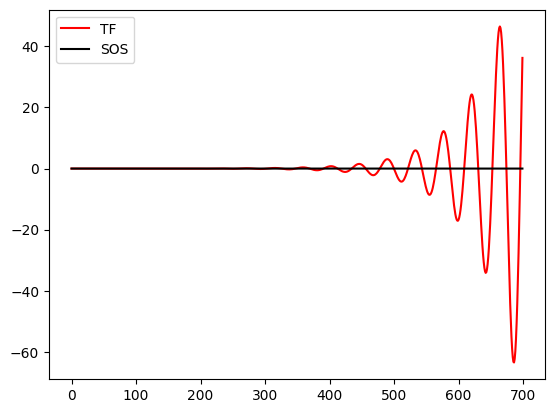

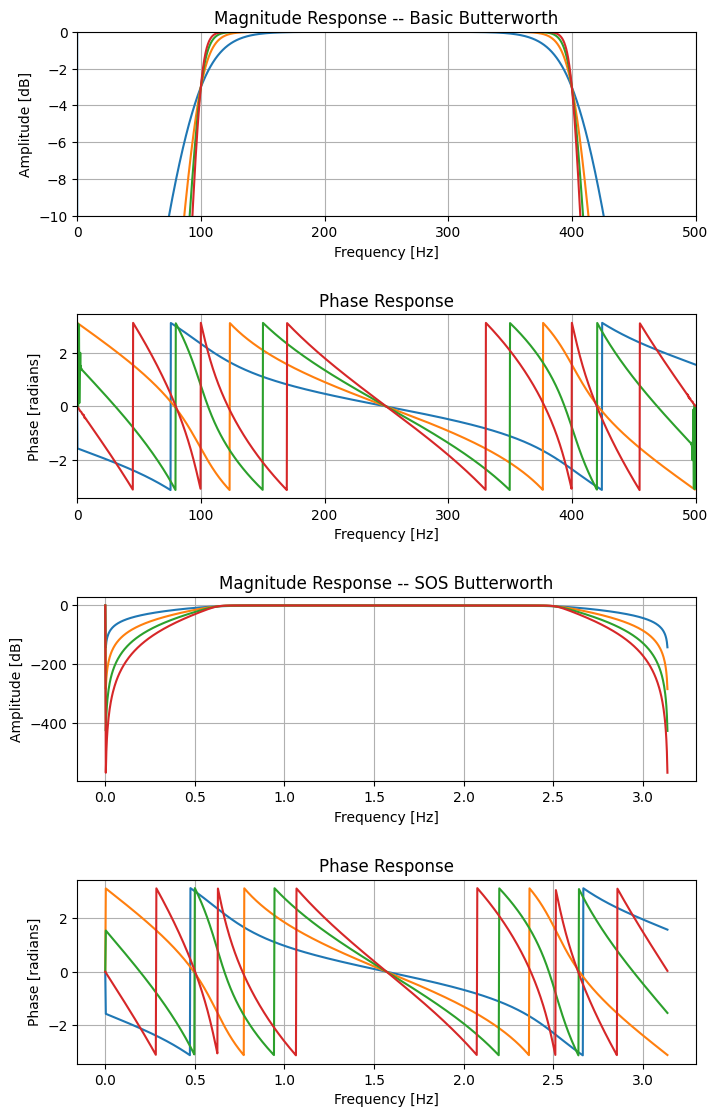

In [ ]:
"""
    bandpass-test-1
    """
from scipy.signal import butter, lfilter, freqz, sosfilt, sosfreqz, ellip, unit_impulse
import numpy as np
import matplotlib.pyplot as plt


# --- this would be filter func for basic butterworth:
def butter_bandpass_filter_basic(data, fc_low, fc_high, fs, order=6):
    b, a = butter(order, [fc_low, fc_high], fs=fs, btype='band')
    y = lfilter(b, a, data)
    return y


# --- this would be filter func for SOS butterworth:  ?????????????????????
def butter_bandpass_filter_sos(data, fc_low, fc_high, fs, order=6):
        nyq = 0.5 * fs
        low = fc_low / nyq
        high = fc_high / nyq
        sos = butter(order, [low, high], fs=fs, btype='band', output='sos')
        y = sosfilt(sos, data)
        return y


if __name__ == "__main__":

    # ===== from scipy docs:  Plot a 13th-order filter’s impulse response using both lfilter and sosfilt, 
    #       showing the instability that results from trying to do a 13th-order filter in a single stage 
    #       (the numerical error pushes some poles outside of the unit circle):
    b, a = ellip(13, 0.009, 80, 0.05, output='ba')
    sos = ellip(13, 0.009, 80, 0.05, output='sos')
    x = unit_impulse(700)
    y_tf = lfilter(b, a, x)
    y_sos = sosfilt(sos, x)
    plt.plot(y_tf, 'r', label='TF')
    plt.plot(y_sos, 'k', label='SOS')
    plt.legend(loc='best')
    plt.show()


    # ===== Sample rate and desired cutoff frequencies (in Hz) for below filters:
    fs = 1000.0
    fc_low = 100.0
    fc_high = 400.0

    fig, axs = plt.subplots(4, 1, figsize=(8, 12))
    fig.tight_layout(pad=5.0)


    # ===== plot the frequency/phase response for a few different orders -- BASIC butterworth.
    for order in [3, 6, 9, 12]:
        b, a = butter(order, [fc_low, fc_high], fs=fs, btype='band')
        w, h = freqz(b, a, fs=fs, worN=2000)
        # the where= traps divide-by-zero runtime warnings
        axs[0].plot(w, 20 * np.log10(np.abs(h), where=np.abs(h)>0), label="order = %d" % order)
        axs[1].plot(w, np.angle(h))
    axs[0].set_xlim(0, 500)
    axs[0].set_ylim(-10, 0)
    axs[0].set_title('Magnitude Response -- Basic Butterworth')
    axs[0].set_xlabel('Frequency [Hz]')
    axs[0].set_ylabel('Amplitude [dB]')
    axs[0].grid(True)
    axs[1].set_xlim(0, 500)
    axs[1].set_title('Phase Response')
    axs[1].set_xlabel('Frequency [Hz]')
    axs[1].set_ylabel('Phase [radians]')
    axs[1].grid(True)


    # ===== plot the frequency/phase response for a few different orders -- SOS butterworth.
    #        (doing directly in hertz gives ValueError: Digital filter critical frequencies must be 0 < Wn < 1)
    #
    # possible to eliminate the phase delay using forward-backward filtering. Just replace sosfilt with sosfiltfilt ???
    # sosfiltfilt ??
    for order in [3, 6, 9, 12]:
        nyq = 0.5 * fs
        low = fc_low / nyq
        high = fc_high / nyq
        sos = butter(order, [low, high], btype='band', output='sos')
        w, h = sosfreqz(sos, worN=1024)
        # the where= traps divide-by-zero runtime warnings
        axs[2].plot(w, 20 * np.log10(np.abs(h), where=np.abs(h)>0), label="order = %d" % order)
        axs[3].plot(w, np.angle(h))
 #   axs[2].set_xlim(0, 500)
 #   axs[2].set_ylim(-10, 0)
    axs[2].set_title('Magnitude Response -- SOS Butterworth')
    axs[2].set_xlabel('Frequency [Hz]')
    axs[2].set_ylabel('Amplitude [dB]')
    axs[2].grid(True)
 #   axs[3].set_xlim(0, 500)
    axs[3].set_title('Phase Response')
    axs[3].set_xlabel('Frequency [Hz]')
    axs[3].set_ylabel('Phase [radians]')
    axs[3].grid(True)
